# Trump Deep Learning


In [1]:
import numpy as np
import json
import tensorflow as tf
from tensorflow import keras
from jass.logs.game_log_entry import GameLogEntry
import pandas as pd
from pathlib import Path


# Create List of Games
Open training data
jass.kit-Version 2.0.3 has to be installed or pulled for this (not the old 2.0.2)


In [2]:
path_to_data = Path('data')
entry1_list = [] # List of lines
entry1_GLE_list = []          # GameLogEntry-List

entry2_list = [] # List of lines
entry2_GLE_list = []          # GameLogEntry-List

entry3_list = [] # List of lines
entry3_GLE_list = []          # GameLogEntry-List

entry4_list = [] # List of lines
entry4_GLE_list = []          # GameLogEntry-List

entry5_list = [] # List of lines
entry5_GLE_list = []          # GameLogEntry-List

entry6_list = [] # List of lines
entry6_GLE_list = []          # GameLogEntry-List

entry7_list = [] # List of lines
entry7_GLE_list = []          # GameLogEntry-List

entry8_list = [] # List of lines
entry8_GLE_list = []          # GameLogEntry-List

entry9_list = [] # List of lines
entry9_GLE_list = []          # GameLogEntry-List

entry10_list = [] # List of lines
entry10_GLE_list = []          # GameLogEntry-List

entry11_list = [] # List of lines
entry11_GLE_list = []          # GameLogEntry-List

entry12_list = [] # List of lines
entry12_GLE_list = []          # GameLogEntry-List

entry13_list = [] # List of lines
entry13_GLE_list = []          # GameLogEntry-List

entry14_list = [] # List of lines
entry14_GLE_list = []          # GameLogEntry-List

entry15_list = [] # List of lines
entry15_GLE_list = []          # GameLogEntry-List

entry16_list = [] # List of lines
entry16_GLE_list = []          # GameLogEntry-List

entry17_list = [] # List of lines
entry17_GLE_list = []          # GameLogEntry-List

entry18_list = [] # List of lines
entry18_GLE_list = []          # GameLogEntry-List

entry19_list = [] # List of lines
entry19_GLE_list = []          # GameLogEntry-List

# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0001.txt") as file:
    # readline returns one line from the file
    entry1_list=file.read().splitlines()
    print(len(entry1_list))

for c in entry1_list:
    content = json.loads(c)
    # print(content["game"])
    entry1_GLE_list.append(GameLogEntry.from_json(content))
    

# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0002.txt") as file:
    # readline returns one line from the file
    entry2_list=file.read().splitlines()
    print(len(entry2_list))

for c in entry2_list:
    content = json.loads(c)
    # print(content["game"])
    entry2_GLE_list.append(GameLogEntry.from_json(content))    
    
# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0003.txt") as file:
    # readline returns one line from the file
    entry3_list=file.read().splitlines()
    print(len(entry3_list))

for c in entry3_list:
    content = json.loads(c)
    # print(content["game"])
    entry3_GLE_list.append(GameLogEntry.from_json(content))    
    
# Each game-file has 100'000 entries:
with open(path_to_data / "jass_game_0004.txt") as file:
    # readline returns one line from the file
    entry4_list=file.read().splitlines()
    print(len(entry4_list))

for c in entry4_list:
    content = json.loads(c)
    # print(content["game"])
    entry4_GLE_list.append(GameLogEntry.from_json(content))    
    
with open(path_to_data / "jass_game_0005.txt") as file:
    # readline returns one line from the file
    entry5_list=file.read().splitlines()
    print(len(entry5_list))

for c in entry5_list:
    content = json.loads(c)
    # print(content["game"])
    entry5_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0006.txt") as file:
    # readline returns one line from the file
    entry6_list=file.read().splitlines()
    print(len(entry6_list))

for c in entry6_list:
    content = json.loads(c)
    # print(content["game"])
    entry6_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0007.txt") as file:
    # readline returns one line from the file
    entry7_list=file.read().splitlines()
    print(len(entry7_list))

for c in entry7_list:
    content = json.loads(c)
    # print(content["game"])
    entry7_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0008.txt") as file:
    # readline returns one line from the file
    entry8_list=file.read().splitlines()
    print(len(entry8_list))

for c in entry8_list:
    content = json.loads(c)
    # print(content["game"])
    entry8_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0009.txt") as file:
    # readline returns one line from the file
    entry9_list=file.read().splitlines()
    print(len(entry9_list))

for c in entry9_list:
    content = json.loads(c)
    # print(content["game"])
    entry9_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0010.txt") as file:
    # readline returns one line from the file
    entry10_list=file.read().splitlines()
    print(len(entry10_list))

for c in entry10_list:
    content = json.loads(c)
    # print(content["game"])
    entry10_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0011.txt") as file:
    # readline returns one line from the file
    entry11_list=file.read().splitlines()
    print(len(entry11_list))

for c in entry11_list:
    content = json.loads(c)
    # print(content["game"])
    entry11_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0012.txt") as file:
    # readline returns one line from the file
    entry12_list=file.read().splitlines()
    print(len(entry12_list))

for c in entry12_list:
    content = json.loads(c)
    # print(content["game"])
    entry12_GLE_list.append(GameLogEntry.from_json(content))  
    
with open(path_to_data / "jass_game_0013.txt") as file:
    # readline returns one line from the file
    entry13_list=file.read().splitlines()
    print(len(entry13_list))

for c in entry13_list:
    content = json.loads(c)
    # print(content["game"])
    entry13_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0014.txt") as file:
    # readline returns one line from the file
    entry14_list=file.read().splitlines()
    print(len(entry14_list))

for c in entry14_list:
    content = json.loads(c)
    # print(content["game"])
    entry14_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0015.txt") as file:
    # readline returns one line from the file
    entry15_list=file.read().splitlines()
    print(len(entry15_list))

for c in entry15_list:
    content = json.loads(c)
    # print(content["game"])
    entry15_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0016.txt") as file:
    # readline returns one line from the file
    entry16_list=file.read().splitlines()
    print(len(entry16_list))

for c in entry16_list:
    content = json.loads(c)
    # print(content["game"])
    entry16_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0017.txt") as file:
    # readline returns one line from the file
    entry17_list=file.read().splitlines()
    print(len(entry17_list))

for c in entry17_list:
    content = json.loads(c)
    # print(content["game"])
    entry17_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0018.txt") as file:
    # readline returns one line from the file
    entry18_list=file.read().splitlines()
    print(len(entry18_list))
    
for c in entry18_list:
    content = json.loads(c)
    # print(content["game"])
    entry18_GLE_list.append(GameLogEntry.from_json(content)) 
    
with open(path_to_data / "jass_game_0019.txt") as file:
    # readline returns one line from the file
    entry19_list=file.read().splitlines()
    print(len(entry19_list))
    
for c in entry19_list:
    content = json.loads(c)
    # print(content["game"])
    entry19_GLE_list.append(GameLogEntry.from_json(content)) 
    

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
21878


### entry game, date, player

GameState has following entries: 
game:
dealer, player, trump, forehand, declared_trump
hands, tricks, trick_winner, trick_points, trick_first_player,
current_trick, nr_tricks, nr_cards_in_trick
nr_played_cards, points

date: the date, when the game was played
playerid's: the player which participated the game

In [3]:
# print(type(entry1_GLE_list[0].game))
# print(type(entry1_GLE_list[0].date))
# print(type(entry1_GLE_list[0].player_ids))
# print(entry1_GLE_list[0].game.dealer)
# print(entry1_GLE_list[0].game.declared_trump)
# print(type(entry1_GLE_list[0]))

#for n in range(1,100):
#    print(entry1_GLE_list[n].game.trump)

#secret hands
We are not allowed to see the hands of the other players --> 
we can only use the hands we are able to observe (tricks and played cards)
but at the end of the match we know the hands of all players. These cards could be accessed
by calculate_starting_hands_from_game

In [4]:
# entry.game.hands

The statistics about each player
id: the id of the player
mean: the mean points in each game
std: the deviation from this mean
nr: the number of games played

In [5]:
with open(path_to_data / "player_all_stat.json") as file:
    playerLog = json.load(file)  
#for i in playerLog:
#    print(i['id'])

# extract successful player
First we extract the ids of the most successful players

In [6]:
bestPlayer = []
print(len(playerLog))
for i in playerLog:
    if i['mean'] >81:
        bestPlayer.append(i['id'])
#    print(i['id'])
print(len(bestPlayer))

# >80: instead of 4609 player only 1189 player
# >82: instead of 4609 player only 687 player
# >83: instead of 4609 player only 573 player
# >84: instead of 4609 player only 403 player

4609
880


# extract entries of most successful player and connect data
Then we extract only the games, where the most successful players declared trump

In [7]:
entry1_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry2_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry3_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry4_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry5_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry6_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry7_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry8_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry9_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry10_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry11_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry12_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry13_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry14_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry15_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry16_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry17_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry18_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entry19_GLE_list_best = []     # GameLogEntry-List of the best 25% of the players
entryTotal_GLE_list_best = []


for i in entry1_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            # When the declaring player is backhand, then the 
            # first player has pushed. For the ML for the first player
            # we have to set therefore the trump = 6 for "pushed"
            if i.game.forehand == 1:
                i.game.trump = 6
            entry1_GLE_list_best.append(i)
            
for i in entry2_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6
            entry2_GLE_list_best.append(i)
            
for i in entry3_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry3_GLE_list_best.append(i)
            
for i in entry4_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry4_GLE_list_best.append(i)
            
for i in entry5_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry5_GLE_list_best.append(i)

for i in entry6_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry6_GLE_list_best.append(i)

for i in entry7_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry7_GLE_list_best.append(i)
            
for i in entry8_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry8_GLE_list_best.append(i)
            
for i in entry9_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry9_GLE_list_best.append(i)
            
for i in entry10_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry10_GLE_list_best.append(i)
            
for i in entry11_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry11_GLE_list_best.append(i)
            
for i in entry12_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry12_GLE_list_best.append(i)
            
for i in entry13_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry13_GLE_list_best.append(i)
            
for i in entry14_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry14_GLE_list_best.append(i)

for i in entry15_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry15_GLE_list_best.append(i)
            
for i in entry16_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry16_GLE_list_best.append(i)
            
for i in entry17_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry17_GLE_list_best.append(i)
            
for i in entry18_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry18_GLE_list_best.append(i)
            
for i in entry19_GLE_list:
       if i.player_ids[i.game.declared_trump] in bestPlayer:
            if i.game.forehand == 1:
                i.game.trump = 6            
            entry19_GLE_list_best.append(i)

# By this we reduce the data, only the best player are used.
entryTotal_GLE_list_best = entry1_GLE_list_best + entry2_GLE_list_best + entry3_GLE_list_best + entry4_GLE_list_best + entry5_GLE_list_best + entry6_GLE_list_best + entry7_GLE_list_best + entry8_GLE_list_best + entry9_GLE_list_best + entry10_GLE_list_best + entry11_GLE_list_best + entry12_GLE_list_best + entry13_GLE_list_best + entry14_GLE_list_best + entry15_GLE_list_best + entry16_GLE_list_best + entry17_GLE_list_best + entry18_GLE_list_best + entry19_GLE_list_best 
print(len(entry1_GLE_list_best))
print(len(entry2_GLE_list_best))
print(len(entry3_GLE_list_best))
print(len(entry4_GLE_list_best))
print(len(entryTotal_GLE_list_best))

#for n in range(1,5):
#    print(entryTotal_GLE_list_best[n].game.trump)

3460
3341
3207
4115
59019


we check if: dealer, declared_trump and forehand are ok

In [8]:
#for c in entryTotal_GLE_list_best:
#    print('dealer: {} '.format(c.game.dealer))
#    print('forehand: {} '.format(c.game.forehand))
#    print('declaring player: {} '.format(c.game.declared_trump))

# extract the hand
Now we have to extract the hand of the declaring player, the forehand, 

In [9]:
from jass.game.game_state_util import calculate_starting_hands_from_game
from tensorflow.keras.utils import to_categorical

# We create the raw input and the raw output
obsHandList=[]
obsForehandList=[]

# Input and Output for Training
obsInput=[]
obsTrumpList=[]

# entryTotal_GLE_list_best[0].game
for c in entryTotal_GLE_list_best:
    obsPlayerHand =[]
    obsDecPlayer= c.game.declared_trump #the declaring player
    obsHands=calculate_starting_hands_from_game(c.game) 
    obsPlayerHand=obsHands[obsDecPlayer]
    
    obsforehand=c.game.forehand
    obsHandList.append(obsPlayerHand)
    obsForehandList.append(obsforehand)
    obsInput.append(np.append(obsPlayerHand,obsforehand))
    
    # Trump is 1-hot-encoded
    obsTrumpList.append(c.game.trump)
    # print('trumpi: {} '.format(i.game.trump))
    # print('game: {} '.format(i.game))

#Trump is 1-hot-encoded
obsTrumpList=to_categorical(obsTrumpList)
#print('obsHandList: {} '.format(obsHandList[0]))
#print('obsForehandList: {} '.format(obsForehandList))

for n in range(1,5):
    print('obsInput: {} '.format(obsInput[n]))
    print('obsTrump: {} '.format(obsTrumpList[n]))
    print('obsInput type: {} '.format(type(obsInput)))
    print('obsTrump type: {} '.format(type(obsTrumpList)))

obsInput: [1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1] 
obsTrump: [0. 0. 0. 0. 0. 0. 1.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0] 
obsTrump: [0. 1. 0. 0. 0. 0. 0.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0] 
obsTrump: [0. 1. 0. 0. 0. 0. 0.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 
obsInput: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0] 
obsTrump: [0. 0. 0. 1. 0. 0. 0.] 
obsInput type: <class 'list'> 
obsTrump type: <class 'numpy.ndarray'> 


In [10]:
obsInputNumpy=np.array(obsInput, dtype=np.float32)
obsTrumpNumpy= np.array(obsTrumpList, dtype=np.float32)

In [11]:
rawDataRows, rawDataColumns = obsInputNumpy.shape
OutputRows, OutputColumns = obsTrumpNumpy.shape
EntryListtRows= np.size(entryTotal_GLE_list_best)
print('rawDataColumns ' + str(rawDataColumns) )
print('categoryColumns ' + str(OutputColumns))
print('rawDataRows ' + str(rawDataRows) )
print('OutputRows ' + str(OutputRows) )

rawDataColumns 37
categoryColumns 7
rawDataRows 59019
OutputRows 59019


# Split training/validation and test data

In [12]:
obsInputNumpyTest,obsInputNumpyValidation = np.array_split(obsInputNumpy, [int(OutputRows/10)])
obsOutputNumpyTest,obsOutputNumpyValidation = np.array_split(obsTrumpNumpy, [int(OutputRows/10)])

In [13]:
InputRowsVal, InputColumnsVal = obsInputNumpyValidation.shape
InputRowsTest, InputColumnsTest = obsInputNumpyTest.shape
OutputRowsVal, OutputColumnsVal = obsOutputNumpyValidation.shape
print('InputColumnsVal ' + str(InputColumnsVal) )
print('InputColumnsTest ' + str(InputColumnsTest ))
print('InputRowsVal ' + str(InputRowsVal) )
print('InputRowsTest ' + str(InputRowsTest) )

InputColumnsVal 37
InputColumnsTest 37
InputRowsVal 53118
InputRowsTest 5901


# Train the model

In [14]:
modelCard = keras.Sequential()
loss_function_used = 'categorical_crossentropy'

# It seems that the number of features has to be equal to the number of categories.
# The input shape is now featureColumns instead of 2
modelCard.add(keras.Input(shape=[InputColumnsVal]))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(InputColumnsVal, activation='relu'))
modelCard.add(keras.layers.Dense(OutputColumnsVal, activation='softmax'))
#Sigmoid cannot be used, since it provides only a classification between 0 and 1
#--> softmax
modelCard.compile(loss= loss_function_used, optimizer='sgd',metrics=['accuracy'])
# Model is trained on only 0.75 of the training data. 0.25 will be used for validation after each epoch.
# In each epoch a batch with size 100 is extracted from the 0.75 training data for training.
# history = modelCard.fit(obsInputNumpyValidation, obsOutputNumpyValidation, validation_split=0.25, epochs=300, batch_size=1000)
history = modelCard.fit(obsInputNumpyValidation, obsOutputNumpyValidation, validation_split=0.25, epochs=2000, batch_size=1000)

Epoch 1/2000
40/40 [==============================] - 0s 8ms/step - loss: 1.8857 - accuracy: 0.2865 - val_loss: 1.8374 - val_accuracy: 0.3968
Epoch 2/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.8050 - accuracy: 0.3965 - val_loss: 1.7729 - val_accuracy: 0.3962
Epoch 3/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.7534 - accuracy: 0.3965 - val_loss: 1.7328 - val_accuracy: 0.3962
Epoch 4/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.7207 - accuracy: 0.3965 - val_loss: 1.7054 - val_accuracy: 0.3962
Epoch 5/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.6954 - accuracy: 0.3965 - val_loss: 1.6811 - val_accuracy: 0.3962
Epoch 6/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.6708 - accuracy: 0.3965 - val_loss: 1.6556 - val_accuracy: 0.3962
Epoch 7/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.6439 - accuracy: 0.3965 - val_loss: 1.6269 - val_accuracy: 0.3962
Epoch 

40/40 [==============================] - 0s 6ms/step - loss: 0.8632 - accuracy: 0.6776 - val_loss: 0.8607 - val_accuracy: 0.6783
Epoch 59/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.8497 - accuracy: 0.6830 - val_loss: 0.8475 - val_accuracy: 0.6809
Epoch 60/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.8361 - accuracy: 0.6875 - val_loss: 0.8344 - val_accuracy: 0.6850
Epoch 61/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.8227 - accuracy: 0.6927 - val_loss: 0.8215 - val_accuracy: 0.6892
Epoch 62/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.8094 - accuracy: 0.6973 - val_loss: 0.8089 - val_accuracy: 0.6934
Epoch 63/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.7963 - accuracy: 0.7013 - val_loss: 0.7964 - val_accuracy: 0.6956
Epoch 64/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.7058 - val_loss: 0.7842 - val_accuracy: 0.7014
Epoch 65/2000

40/40 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8333 - val_loss: 0.4729 - val_accuracy: 0.8248
Epoch 116/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.8343 - val_loss: 0.4709 - val_accuracy: 0.8250
Epoch 117/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8357 - val_loss: 0.4681 - val_accuracy: 0.8254
Epoch 118/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.8366 - val_loss: 0.4656 - val_accuracy: 0.8274
Epoch 119/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8375 - val_loss: 0.4640 - val_accuracy: 0.8277
Epoch 120/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8399 - val_loss: 0.4615 - val_accuracy: 0.8302
Epoch 121/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8410 - val_loss: 0.4588 - val_accuracy: 0.8313
Epoch 1

Epoch 172/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.8581 - val_loss: 0.4197 - val_accuracy: 0.8466
Epoch 173/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8584 - val_loss: 0.4201 - val_accuracy: 0.8463
Epoch 174/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8578 - val_loss: 0.4195 - val_accuracy: 0.8485
Epoch 175/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.8590 - val_loss: 0.4193 - val_accuracy: 0.8482
Epoch 176/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8582 - val_loss: 0.4195 - val_accuracy: 0.8473
Epoch 177/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8591 - val_loss: 0.4208 - val_accuracy: 0.8474
Epoch 178/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8587 - val_loss: 0.4199 - val_accuracy:

Epoch 229/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8600 - val_loss: 0.4121 - val_accuracy: 0.8472
Epoch 230/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.8617 - val_loss: 0.4129 - val_accuracy: 0.8475
Epoch 231/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3722 - accuracy: 0.8615 - val_loss: 0.4130 - val_accuracy: 0.8486
Epoch 232/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8610 - val_loss: 0.4134 - val_accuracy: 0.8483
Epoch 233/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8613 - val_loss: 0.4127 - val_accuracy: 0.8474
Epoch 234/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8612 - val_loss: 0.4131 - val_accuracy: 0.8485
Epoch 235/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8618 - val_loss: 0.4121 - val_accuracy:

Epoch 286/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8629 - val_loss: 0.4074 - val_accuracy: 0.8492
Epoch 287/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8631 - val_loss: 0.4074 - val_accuracy: 0.8495
Epoch 288/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8625 - val_loss: 0.4073 - val_accuracy: 0.8501
Epoch 289/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8629 - val_loss: 0.4075 - val_accuracy: 0.8504
Epoch 290/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8630 - val_loss: 0.4080 - val_accuracy: 0.8495
Epoch 291/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8628 - val_loss: 0.4073 - val_accuracy: 0.8484
Epoch 292/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3641 - accuracy: 0.8629 - val_loss: 0.4102 - val_accuracy:

Epoch 343/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8651 - val_loss: 0.4043 - val_accuracy: 0.8517
Epoch 344/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8653 - val_loss: 0.4063 - val_accuracy: 0.8478
Epoch 345/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8647 - val_loss: 0.4037 - val_accuracy: 0.8509
Epoch 346/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8649 - val_loss: 0.4036 - val_accuracy: 0.8502
Epoch 347/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8652 - val_loss: 0.4047 - val_accuracy: 0.8495
Epoch 348/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8652 - val_loss: 0.4041 - val_accuracy: 0.8512
Epoch 349/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8651 - val_loss: 0.4043 - val_accuracy:

Epoch 400/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.8667 - val_loss: 0.4023 - val_accuracy: 0.8515
Epoch 401/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8663 - val_loss: 0.4015 - val_accuracy: 0.8501
Epoch 402/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3544 - accuracy: 0.8667 - val_loss: 0.4017 - val_accuracy: 0.8496
Epoch 403/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8661 - val_loss: 0.4022 - val_accuracy: 0.8500
Epoch 404/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3543 - accuracy: 0.8669 - val_loss: 0.4016 - val_accuracy: 0.8515
Epoch 405/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8669 - val_loss: 0.4012 - val_accuracy: 0.8517
Epoch 406/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3542 - accuracy: 0.8670 - val_loss: 0.4011 - val_accuracy:

40/40 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.8676 - val_loss: 0.4000 - val_accuracy: 0.8502
Epoch 457/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8681 - val_loss: 0.4009 - val_accuracy: 0.8511
Epoch 458/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.8678 - val_loss: 0.3998 - val_accuracy: 0.8498
Epoch 459/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.8677 - val_loss: 0.4008 - val_accuracy: 0.8495
Epoch 460/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8672 - val_loss: 0.3999 - val_accuracy: 0.8502
Epoch 461/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.8679 - val_loss: 0.4009 - val_accuracy: 0.8506
Epoch 462/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.8680 - val_loss: 0.4001 - val_accuracy: 0.8523
Epoch 4

Epoch 513/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.8683 - val_loss: 0.3998 - val_accuracy: 0.8511
Epoch 514/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8692 - val_loss: 0.3988 - val_accuracy: 0.8495
Epoch 515/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8690 - val_loss: 0.3994 - val_accuracy: 0.8484
Epoch 516/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8686 - val_loss: 0.3994 - val_accuracy: 0.8519
Epoch 517/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8686 - val_loss: 0.3994 - val_accuracy: 0.8506
Epoch 518/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8681 - val_loss: 0.3986 - val_accuracy: 0.8517
Epoch 519/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8685 - val_loss: 0.3989 - val_accuracy:

Epoch 570/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.8697 - val_loss: 0.3983 - val_accuracy: 0.8492
Epoch 571/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.8697 - val_loss: 0.3984 - val_accuracy: 0.8502
Epoch 572/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.8695 - val_loss: 0.4000 - val_accuracy: 0.8508
Epoch 573/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8697 - val_loss: 0.3980 - val_accuracy: 0.8507
Epoch 574/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3453 - accuracy: 0.8701 - val_loss: 0.4011 - val_accuracy: 0.8517
Epoch 575/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.8693 - val_loss: 0.4001 - val_accuracy: 0.8515
Epoch 576/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.8688 - val_loss: 0.3994 - val_accuracy:

Epoch 627/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8702 - val_loss: 0.3993 - val_accuracy: 0.8511
Epoch 628/2000
40/40 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.86 - 0s 5ms/step - loss: 0.3430 - accuracy: 0.8700 - val_loss: 0.3992 - val_accuracy: 0.8498
Epoch 629/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8705 - val_loss: 0.4004 - val_accuracy: 0.8501
Epoch 630/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8702 - val_loss: 0.3982 - val_accuracy: 0.8488
Epoch 631/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8705 - val_loss: 0.3979 - val_accuracy: 0.8497
Epoch 632/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8700 - val_loss: 0.3989 - val_accuracy: 0.8509
Epoch 633/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy:

40/40 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.8700 - val_loss: 0.3980 - val_accuracy: 0.8517
Epoch 684/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8704 - val_loss: 0.3979 - val_accuracy: 0.8512
Epoch 685/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8707 - val_loss: 0.3978 - val_accuracy: 0.8519
Epoch 686/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.8711 - val_loss: 0.3981 - val_accuracy: 0.8508
Epoch 687/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3403 - accuracy: 0.8714 - val_loss: 0.3989 - val_accuracy: 0.8514
Epoch 688/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8709 - val_loss: 0.3982 - val_accuracy: 0.8490
Epoch 689/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.8707 - val_loss: 0.3983 - val_accuracy: 0.8498
Epoch 6

Epoch 740/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8715 - val_loss: 0.3991 - val_accuracy: 0.8496
Epoch 741/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8712 - val_loss: 0.3989 - val_accuracy: 0.8519
Epoch 742/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8718 - val_loss: 0.3977 - val_accuracy: 0.8517
Epoch 743/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8727 - val_loss: 0.3997 - val_accuracy: 0.8508
Epoch 744/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8715 - val_loss: 0.3997 - val_accuracy: 0.8511
Epoch 745/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8719 - val_loss: 0.3989 - val_accuracy: 0.8506
Epoch 746/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.8723 - val_loss: 0.3977 - val_accuracy:

Epoch 797/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.8730 - val_loss: 0.3986 - val_accuracy: 0.8515
Epoch 798/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.8726 - val_loss: 0.3980 - val_accuracy: 0.8505
Epoch 799/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8727 - val_loss: 0.3990 - val_accuracy: 0.8505
Epoch 800/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8729 - val_loss: 0.3980 - val_accuracy: 0.8517
Epoch 801/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.8726 - val_loss: 0.3983 - val_accuracy: 0.8511
Epoch 802/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8728 - val_loss: 0.3984 - val_accuracy: 0.8491
Epoch 803/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3359 - accuracy: 0.8725 - val_loss: 0.3993 - val_accuracy:

Epoch 854/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8736 - val_loss: 0.3984 - val_accuracy: 0.8491
Epoch 855/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8744 - val_loss: 0.3989 - val_accuracy: 0.8505
Epoch 856/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8742 - val_loss: 0.3979 - val_accuracy: 0.8517
Epoch 857/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8740 - val_loss: 0.3982 - val_accuracy: 0.8503
Epoch 858/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8736 - val_loss: 0.3988 - val_accuracy: 0.8505
Epoch 859/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8740 - val_loss: 0.3981 - val_accuracy: 0.8496
Epoch 860/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8739 - val_loss: 0.3989 - val_accuracy:

Epoch 911/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8742 - val_loss: 0.3987 - val_accuracy: 0.8510
Epoch 912/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8747 - val_loss: 0.3986 - val_accuracy: 0.8499
Epoch 913/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8738 - val_loss: 0.3983 - val_accuracy: 0.8503
Epoch 914/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8749 - val_loss: 0.3986 - val_accuracy: 0.8507
Epoch 915/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8748 - val_loss: 0.3983 - val_accuracy: 0.8503
Epoch 916/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.8742 - val_loss: 0.3985 - val_accuracy: 0.8498
Epoch 917/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8740 - val_loss: 0.3995 - val_accuracy:

Epoch 968/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8755 - val_loss: 0.3992 - val_accuracy: 0.8508
Epoch 969/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8751 - val_loss: 0.3995 - val_accuracy: 0.8509
Epoch 970/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8751 - val_loss: 0.4003 - val_accuracy: 0.8510
Epoch 971/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8750 - val_loss: 0.3991 - val_accuracy: 0.8509
Epoch 972/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8753 - val_loss: 0.3991 - val_accuracy: 0.8505
Epoch 973/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.8752 - val_loss: 0.3988 - val_accuracy: 0.8510
Epoch 974/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8762 - val_loss: 0.3995 - val_accuracy:

Epoch 1025/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3293 - accuracy: 0.8763 - val_loss: 0.3988 - val_accuracy: 0.8508
Epoch 1026/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8761 - val_loss: 0.3989 - val_accuracy: 0.8508
Epoch 1027/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3292 - accuracy: 0.8760 - val_loss: 0.3996 - val_accuracy: 0.8520
Epoch 1028/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8756 - val_loss: 0.3988 - val_accuracy: 0.8512
Epoch 1029/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8758 - val_loss: 0.3987 - val_accuracy: 0.8511
Epoch 1030/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8757 - val_loss: 0.4017 - val_accuracy: 0.8508
Epoch 1031/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8758 - val_loss: 0.3992 - val_ac

40/40 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8762 - val_loss: 0.3990 - val_accuracy: 0.8509
Epoch 1082/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.8766 - val_loss: 0.3989 - val_accuracy: 0.8521
Epoch 1083/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8768 - val_loss: 0.3996 - val_accuracy: 0.8514
Epoch 1084/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.8769 - val_loss: 0.3994 - val_accuracy: 0.8514
Epoch 1085/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8764 - val_loss: 0.3993 - val_accuracy: 0.8517
Epoch 1086/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8764 - val_loss: 0.3990 - val_accuracy: 0.8513
Epoch 1087/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.8769 - val_loss: 0.3993 - val_accuracy: 0.8512
E

40/40 [==============================] - 0s 5ms/step - loss: 0.3261 - accuracy: 0.8770 - val_loss: 0.4008 - val_accuracy: 0.8513
Epoch 1138/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8768 - val_loss: 0.3998 - val_accuracy: 0.8518
Epoch 1139/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8774 - val_loss: 0.4015 - val_accuracy: 0.8497
Epoch 1140/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.8773 - val_loss: 0.3996 - val_accuracy: 0.8511
Epoch 1141/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8768 - val_loss: 0.4013 - val_accuracy: 0.8513
Epoch 1142/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8763 - val_loss: 0.3990 - val_accuracy: 0.8524
Epoch 1143/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.8771 - val_loss: 0.3998 - val_accuracy: 0.8511
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8777 - val_loss: 0.3998 - val_accuracy: 0.8521
Epoch 1194/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8782 - val_loss: 0.3995 - val_accuracy: 0.8513
Epoch 1195/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.8781 - val_loss: 0.4010 - val_accuracy: 0.8513
Epoch 1196/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8783 - val_loss: 0.3993 - val_accuracy: 0.8511
Epoch 1197/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8784 - val_loss: 0.3997 - val_accuracy: 0.8508
Epoch 1198/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8779 - val_loss: 0.4003 - val_accuracy: 0.8526
Epoch 1199/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8780 - val_loss: 0.4004 - val_accuracy: 0.8521
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8784 - val_loss: 0.4001 - val_accuracy: 0.8517
Epoch 1250/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8783 - val_loss: 0.4017 - val_accuracy: 0.8527
Epoch 1251/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8785 - val_loss: 0.4004 - val_accuracy: 0.8520
Epoch 1252/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8783 - val_loss: 0.3998 - val_accuracy: 0.8520
Epoch 1253/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8789 - val_loss: 0.4006 - val_accuracy: 0.8515
Epoch 1254/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.8782 - val_loss: 0.4016 - val_accuracy: 0.8514
Epoch 1255/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3234 - accuracy: 0.8788 - val_loss: 0.4005 - val_accuracy: 0.8523
E

40/40 [==============================] - 0s 5ms/step - loss: 0.3222 - accuracy: 0.8785 - val_loss: 0.4013 - val_accuracy: 0.8527
Epoch 1306/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3220 - accuracy: 0.8789 - val_loss: 0.4019 - val_accuracy: 0.8508
Epoch 1307/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8796 - val_loss: 0.4015 - val_accuracy: 0.8517
Epoch 1308/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8785 - val_loss: 0.4010 - val_accuracy: 0.8504
Epoch 1309/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8786 - val_loss: 0.3996 - val_accuracy: 0.8526
Epoch 1310/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8785 - val_loss: 0.3999 - val_accuracy: 0.8524
Epoch 1311/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8789 - val_loss: 0.4003 - val_accuracy: 0.8523
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8786 - val_loss: 0.4008 - val_accuracy: 0.8515
Epoch 1362/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8794 - val_loss: 0.4004 - val_accuracy: 0.8522
Epoch 1363/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3215 - accuracy: 0.8789 - val_loss: 0.4013 - val_accuracy: 0.8517
Epoch 1364/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8788 - val_loss: 0.4005 - val_accuracy: 0.8521
Epoch 1365/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8801 - val_loss: 0.4012 - val_accuracy: 0.8527
Epoch 1366/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8792 - val_loss: 0.4019 - val_accuracy: 0.8521
Epoch 1367/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8782 - val_loss: 0.4036 - val_accuracy: 0.8516
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8794 - val_loss: 0.4013 - val_accuracy: 0.8528
Epoch 1418/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3196 - accuracy: 0.8801 - val_loss: 0.4012 - val_accuracy: 0.8533
Epoch 1419/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8802 - val_loss: 0.4033 - val_accuracy: 0.8521
Epoch 1420/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8803 - val_loss: 0.4006 - val_accuracy: 0.8527
Epoch 1421/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3197 - accuracy: 0.8797 - val_loss: 0.4010 - val_accuracy: 0.8523
Epoch 1422/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8796 - val_loss: 0.4004 - val_accuracy: 0.8516
Epoch 1423/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8802 - val_loss: 0.4014 - val_accuracy: 0.8524
E

40/40 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.8799 - val_loss: 0.4008 - val_accuracy: 0.8521
Epoch 1474/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.8796 - val_loss: 0.4036 - val_accuracy: 0.8517
Epoch 1475/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3193 - accuracy: 0.8798 - val_loss: 0.4010 - val_accuracy: 0.8532
Epoch 1476/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.8799 - val_loss: 0.4017 - val_accuracy: 0.8532
Epoch 1477/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8805 - val_loss: 0.4016 - val_accuracy: 0.8522
Epoch 1478/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8803 - val_loss: 0.4017 - val_accuracy: 0.8519
Epoch 1479/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.8802 - val_loss: 0.4014 - val_accuracy: 0.8529
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8807 - val_loss: 0.4036 - val_accuracy: 0.8517
Epoch 1530/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3180 - accuracy: 0.8809 - val_loss: 0.4023 - val_accuracy: 0.8520
Epoch 1531/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8807 - val_loss: 0.4023 - val_accuracy: 0.8517
Epoch 1532/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8809 - val_loss: 0.4015 - val_accuracy: 0.8523
Epoch 1533/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8805 - val_loss: 0.4014 - val_accuracy: 0.8535
Epoch 1534/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8809 - val_loss: 0.4013 - val_accuracy: 0.8530
Epoch 1535/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.8798 - val_loss: 0.4016 - val_accuracy: 0.8537
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8812 - val_loss: 0.4032 - val_accuracy: 0.8524
Epoch 1586/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3169 - accuracy: 0.8809 - val_loss: 0.4015 - val_accuracy: 0.8532
Epoch 1587/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8815 - val_loss: 0.4038 - val_accuracy: 0.8523
Epoch 1588/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8810 - val_loss: 0.4037 - val_accuracy: 0.8538
Epoch 1589/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.8809 - val_loss: 0.4016 - val_accuracy: 0.8533
Epoch 1590/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8805 - val_loss: 0.4025 - val_accuracy: 0.8538
Epoch 1591/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8806 - val_loss: 0.4025 - val_accuracy: 0.8541
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8807 - val_loss: 0.4028 - val_accuracy: 0.8544
Epoch 1642/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8816 - val_loss: 0.4021 - val_accuracy: 0.8542
Epoch 1643/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8814 - val_loss: 0.4020 - val_accuracy: 0.8524
Epoch 1644/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.8814 - val_loss: 0.4036 - val_accuracy: 0.8541
Epoch 1645/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8811 - val_loss: 0.4020 - val_accuracy: 0.8520
Epoch 1646/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8808 - val_loss: 0.4024 - val_accuracy: 0.8544
Epoch 1647/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8806 - val_loss: 0.4030 - val_accuracy: 0.8529
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3147 - accuracy: 0.8814 - val_loss: 0.4034 - val_accuracy: 0.8523
Epoch 1698/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.8810 - val_loss: 0.4032 - val_accuracy: 0.8538
Epoch 1699/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8824 - val_loss: 0.4034 - val_accuracy: 0.8525
Epoch 1700/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8815 - val_loss: 0.4041 - val_accuracy: 0.8546
Epoch 1701/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.8820 - val_loss: 0.4029 - val_accuracy: 0.8516
Epoch 1702/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8816 - val_loss: 0.4055 - val_accuracy: 0.8521
Epoch 1703/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3151 - accuracy: 0.8820 - val_loss: 0.4035 - val_accuracy: 0.8541
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8822 - val_loss: 0.4045 - val_accuracy: 0.8539
Epoch 1754/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8820 - val_loss: 0.4037 - val_accuracy: 0.8541
Epoch 1755/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8816 - val_loss: 0.4033 - val_accuracy: 0.8541
Epoch 1756/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.8824 - val_loss: 0.4065 - val_accuracy: 0.8523
Epoch 1757/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.8827 - val_loss: 0.4032 - val_accuracy: 0.8543
Epoch 1758/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8819 - val_loss: 0.4029 - val_accuracy: 0.8537
Epoch 1759/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8823 - val_loss: 0.4042 - val_accuracy: 0.8541
E

40/40 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8829 - val_loss: 0.4043 - val_accuracy: 0.8536
Epoch 1810/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8830 - val_loss: 0.4038 - val_accuracy: 0.8540
Epoch 1811/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8824 - val_loss: 0.4057 - val_accuracy: 0.8535
Epoch 1812/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8831 - val_loss: 0.4040 - val_accuracy: 0.8524
Epoch 1813/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8817 - val_loss: 0.4039 - val_accuracy: 0.8520
Epoch 1814/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.8821 - val_loss: 0.4041 - val_accuracy: 0.8540
Epoch 1815/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8831 - val_loss: 0.4041 - val_accuracy: 0.8529
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8826 - val_loss: 0.4036 - val_accuracy: 0.8521
Epoch 1866/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8829 - val_loss: 0.4054 - val_accuracy: 0.8524
Epoch 1867/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8838 - val_loss: 0.4044 - val_accuracy: 0.8525
Epoch 1868/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8832 - val_loss: 0.4050 - val_accuracy: 0.8529
Epoch 1869/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8831 - val_loss: 0.4051 - val_accuracy: 0.8533
Epoch 1870/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8832 - val_loss: 0.4047 - val_accuracy: 0.8539
Epoch 1871/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8831 - val_loss: 0.4048 - val_accuracy: 0.8541
E

40/40 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8825 - val_loss: 0.4064 - val_accuracy: 0.8537
Epoch 1922/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.8826 - val_loss: 0.4054 - val_accuracy: 0.8542
Epoch 1923/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8831 - val_loss: 0.4055 - val_accuracy: 0.8547
Epoch 1924/2000
40/40 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.8830 - val_loss: 0.4062 - val_accuracy: 0.8545
Epoch 1925/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.8828 - val_loss: 0.4064 - val_accuracy: 0.8525
Epoch 1926/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.8825 - val_loss: 0.4046 - val_accuracy: 0.8532
Epoch 1927/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.8828 - val_loss: 0.4052 - val_accuracy: 0.8528
E

40/40 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.8827 - val_loss: 0.4056 - val_accuracy: 0.8535
Epoch 1978/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8833 - val_loss: 0.4057 - val_accuracy: 0.8533
Epoch 1979/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8831 - val_loss: 0.4055 - val_accuracy: 0.8541
Epoch 1980/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3109 - accuracy: 0.8833 - val_loss: 0.4068 - val_accuracy: 0.8529
Epoch 1981/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.8841 - val_loss: 0.4052 - val_accuracy: 0.8531
Epoch 1982/2000
40/40 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.8828 - val_loss: 0.4047 - val_accuracy: 0.8541
Epoch 1983/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8836 - val_loss: 0.4062 - val_accuracy: 0.8538
E

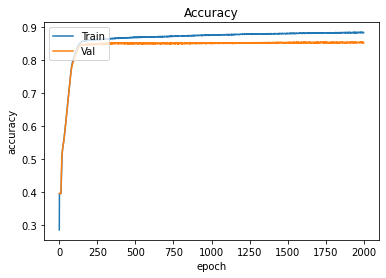

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Test the model

In [16]:
results = modelCard.evaluate(obsInputNumpyTest, obsOutputNumpyTest, batch_size=1000)

6/6 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8570


In [17]:
from sklearn import model_selection
import pickle

# filename = 'finalized_model_ml.sav'
foldername = 'model_ml'
# pickle.dump(modelCard, open(filename, 'wb'))
modelCard.save(foldername)
print('saved')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_ml\assets
saved
